In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import itertools
import math
import collections

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
df = online_retail.data.features 
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     541909 non-null  int64         
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   CustomerID   406829 non-null  float64       
 5   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 24.8+ MB


/tmp/ipykernel_74/40610843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [5]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [6]:
df['CustomerID'].nunique()

4372

In [7]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df['weekend'] = df['InvoiceDate'].dt.day_name().isin(['Saturday', 'Sunday'])
df

/tmp/ipykernel_74/2042801997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekend'] = df['InvoiceDate'].dt.day_name().isin(['Saturday', 'Sunday'])


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekend
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


In [9]:
df['weekend'].value_counts()

weekend
False    477534
True      64375
Name: count, dtype: int64

In [10]:
df['date'] = df['InvoiceDate'].dt.date

df['time'] = df['InvoiceDate'].dt.time

df['month'] = df['InvoiceDate'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

df['hour'] = df['InvoiceDate'].dt.hour
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

df['weekday'] = df['InvoiceDate'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

df.drop('InvoiceDate', axis = 1, inplace = True)


In [11]:
df

,Description,Quantity,UnitPrice,CustomerID,Country,weekend,date,time,month,hour,weekday
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,False,2010-12-01,08:26:00,December,8-9,Wednesday
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,False,2010-12-01,08:26:00,December,8-9,Wednesday
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,False,2010-12-01,08:26:00,December,8-9,Wednesday
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,False,2010-12-01,08:26:00,December,8-9,Wednesday
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,False,2010-12-01,08:26:00,December,8-9,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,False,2011-12-09,12:50:00,December,12-13,Friday
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,False,2011-12-09,12:50:00,December,12-13,Friday
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,False,2011-12-09,12:50:00,December,12-13,Friday
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,False,2011-12-09,12:50:00,December,12-13,Friday


In [12]:
df['Description'] = df['Description'].str.strip()
df['Description'] = df['Description'].str.lower()

In [13]:
df.shape

(541909, 11)

In [14]:
df = df[~df.duplicated()]
df.shape

(535892, 11)

In [15]:
df['Quantity'].min()

-80995

# ???????????????????????????????????????
the quantities of each product (item) per transaction

In [16]:
df = df[df['Quantity']>0]
len(df)

525348

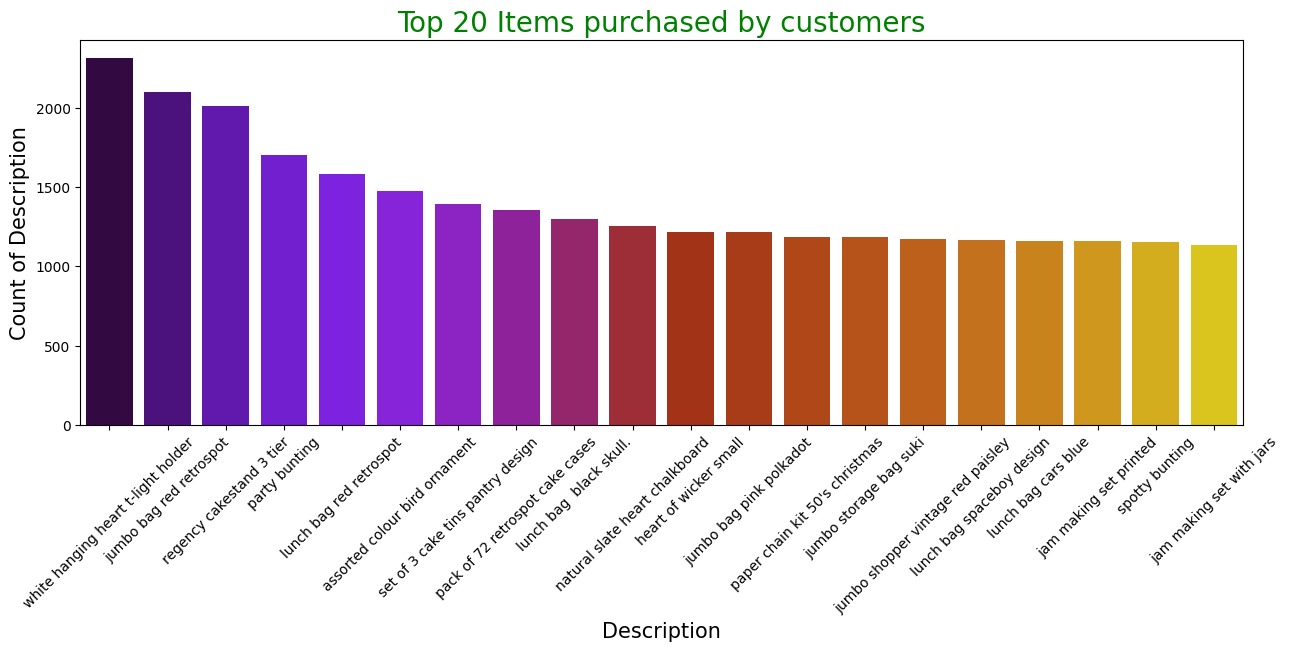

In [17]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x = df.Description.value_counts().head(20).index, y = df.Description.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Description', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Description', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()



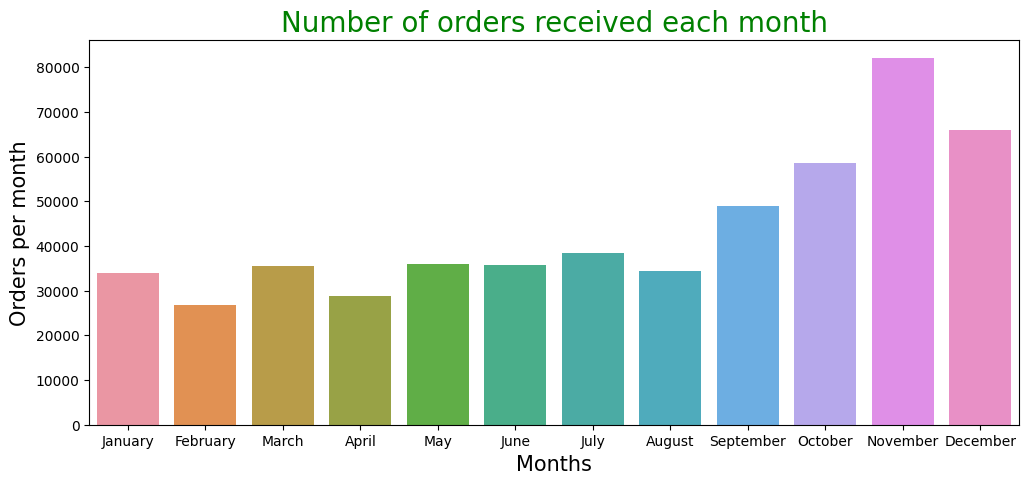

In [18]:
monthTran = df.groupby('month')['Description'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Description")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()



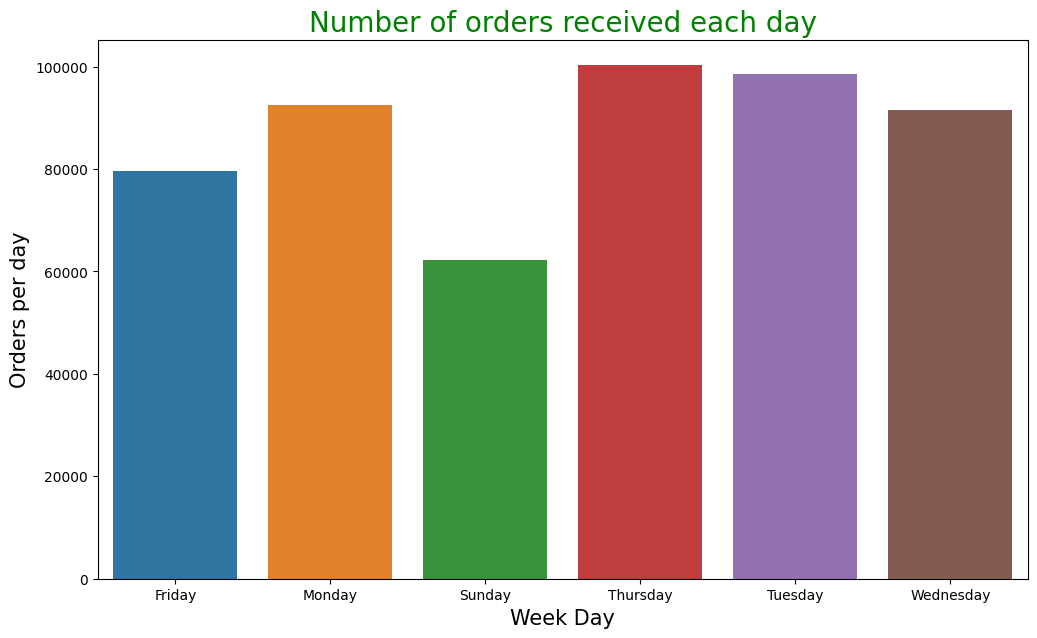

In [19]:


weekTran = df.groupby('weekday')['Description'].count().reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data = weekTran, x = "weekday", y = "Description")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()



In [20]:
transactions_str = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index(name ='Count')
transactions_str

,CustomerID,Description,Count
0,12346.0,medium ceramic top storage jar,74215
1,12347.0,3d dog picture playing cards,126
2,12347.0,3d sheet of cat stickers,12
3,12347.0,3d sheet of dog stickers,12
4,12347.0,60 teatime fairy cake cases,72
...,...,...,...
268166,18287.0,star t-light holder willie winkie,12
268167,18287.0,strawberry bath sponge,30
268168,18287.0,strawberry ceramic trinket box,12
268169,18287.0,swiss chalet tree decoration,48


In [21]:
my_basket = transactions_str.pivot_table(index='CustomerID', columns='Description', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.map(encode)


In [23]:
my_basket_sets.head()

Description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
my_basket_sets.shape

(4339, 3866)

In [25]:
my_basket_sets.sum().sum()

268171

In [26]:
col_percent = dict()
for i in my_basket_sets:
    col_percent[i] = my_basket_sets[i].sum()/24446

In [27]:
my_basket_sets.shape

(4339, 3866)

In [28]:
avg = 0
for k,v in col_percent.items():
    avg+=v
avg = avg/len(col_percent)
avg

0.0028375410583263735

In [29]:
q75 = np.quantile(list(col_percent.values()),0.75)
q75

0.003886116338051215

In [30]:
drop_colavg =[]
for k,v in col_percent.items():
    if avg >v:
        drop_colavg.append(k)
len(drop_colavg)

2579

In [31]:
drop_col75 =[]
for k,v in col_percent.items():
    if q75 >v:
        drop_col75.append(k)
len(drop_col75)

2898

In [32]:
q97 = np.quantile(list(col_percent.values()),0.97)
drop_col97 =[]
for k,v in col_percent.items():
    if q97 >v:
        drop_col97.append(k)
len(drop_col97)

3749

In [33]:
q99 = np.quantile(list(col_percent.values()),0.99)
drop_col99 =[]
for k,v in col_percent.items():
    if q99 >v:
        drop_col99.append(k)
len(drop_col99)

3827

In [34]:


def generate_new_combinations(old_combinations, X, min_support, is_sparse):

    items_types_in_previous_step = np.unique(old_combinations.flatten())
    rows_count = X.shape[0]
    threshold = min_support * rows_count
    for old_combination in old_combinations:
        max_combination = old_combination[-1]
        mask = items_types_in_previous_step > max_combination
        valid_items = items_types_in_previous_step[mask]
        old_tuple = tuple(old_combination)
        if is_sparse:
            mask_rows = X[:, old_tuple].toarray().all(axis=1)
            X_cols = X[:, valid_items].toarray()
            supports = X_cols[mask_rows].sum(axis=0)
        else:
            mask_rows = X[:, old_tuple].all(axis=1)
            supports = X[mask_rows][:, valid_items].sum(axis=0)
        valid_indices = (supports >= threshold).nonzero()[0]
        for index in valid_indices:
            yield supports[index]
            yield from old_tuple
            yield valid_items[index]


def apriori(
    df, min_support=0.5, use_colnames=False, max_len=None
):
   

    def _support(_x, _n_rows, _is_sparse):
        out = np.sum(_x, axis=0) / _n_rows
        return np.array(out).reshape(-1)



    X = df.values
    is_sparse = False
    support = _support(X, X.shape[0], is_sparse)
    ary_col_idx = np.arange(X.shape[1])
    support_dict = {1: support[support >= min_support]}
    itemset_dict = {1: ary_col_idx[support >= min_support].reshape(-1, 1)}
    max_itemset = 1
    rows_count = float(X.shape[0])

    all_ones = np.ones((int(rows_count), 1))

    while max_itemset and max_itemset < (max_len or float("inf")):
        next_max_itemset = max_itemset + 1

        
        combin = generate_new_combinations(
            itemset_dict[max_itemset], X, min_support, is_sparse
        )
        combin = np.fromiter(combin, dtype=int)
        combin = combin.reshape(-1, next_max_itemset + 1)

        if combin.size == 0:
            break

        itemset_dict[next_max_itemset] = combin[:, 1:]
        support_dict[next_max_itemset] = combin[:, 0].astype(float) / rows_count
        max_itemset = next_max_itemset
        
    all_res = []
    for k in sorted(itemset_dict):
        support = pd.Series(support_dict[k])
        itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]], dtype="object")

        res = pd.concat((support, itemsets), axis=1)
        all_res.append(res)

    res_df = pd.concat(all_res)
    res_df.columns = ["support", "itemsets"]
    if use_colnames:
        mapping = {idx: item for idx, item in enumerate(df.columns)}
        res_df["itemsets"] = res_df["itemsets"].apply(
            lambda x: frozenset([mapping[i] for i in x])
        )
    res_df = res_df.reset_index(drop=True)



    return res_df

In [35]:




def association_rules(df, metric="confidence", min_threshold=0.8, support_only=False):

    def conviction_helper(sAC, sA, sC):
        confidence = sAC / sA
        conviction = np.empty(confidence.shape, dtype=float)
        if not len(conviction.shape):
            conviction = conviction[np.newaxis]
            confidence = confidence[np.newaxis]
            sAC = sAC[np.newaxis]
            sA = sA[np.newaxis]
            sC = sC[np.newaxis]
        conviction[:] = np.inf
        conviction[confidence < 1.0] = (1.0 - sC[confidence < 1.0]) / (
            1.0 - confidence[confidence < 1.0]
        )

        return conviction

    def zhangs_metric_helper(sAC, sA, sC):
        denominator = np.maximum(sAC * (1 - sA), sA * (sC - sAC))
        numerator = metric_dict["leverage"](sAC, sA, sC)

        with np.errstate(divide="ignore", invalid="ignore"):
            zhangs_metric = np.where(denominator == 0, 0, numerator / denominator)

        return zhangs_metric

    metric_dict = {
        "antecedent support": lambda _, sA, __: sA,
        "consequent support": lambda _, __, sC: sC,
        "support": lambda sAC, _, __: sAC,
        "confidence": lambda sAC, sA, _: sAC / sA,
        "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC) / sC,
    }

    columns_ordered = [
        "antecedent support",
        "consequent support",
        "support",
        "confidence",
        "lift",
    ]

    if support_only:
        metric = "support"

    keys = df["itemsets"].values
    values = df["support"].values
    frozenset_vect = np.vectorize(lambda x: frozenset(x))
    frequent_items_dict = dict(zip(frozenset_vect(keys), values))

    rule_antecedents = []
    rule_consequents = []
    rule_supports = []

    for k in frequent_items_dict.keys():
        sAC = frequent_items_dict[k]
        for idx in range(len(k) - 1, 0, -1):
            for c in combinations(k, r=idx):
                antecedent = frozenset(c)
                consequent = k.difference(antecedent)

                if support_only:
                    sA = None
                    sC = None

                else:
                    sA = frequent_items_dict[antecedent]
                    sC = frequent_items_dict[consequent]
                    

                score = metric_dict[metric](sAC, sA, sC)
                if score >= min_threshold:
                    rule_antecedents.append(antecedent)
                    rule_consequents.append(consequent)
                    rule_supports.append([sAC, sA, sC])

    if not rule_supports:
        return pd.DataFrame(columns=["antecedents", "consequents"] + columns_ordered)

    else:
        rule_supports = np.array(rule_supports).T.astype(float)
        df_res = pd.DataFrame(
            data=list(zip(rule_antecedents, rule_consequents)),
            columns=["antecedents", "consequents"],
        )

        if support_only:
            sAC = rule_supports[0]
            for m in columns_ordered:
                df_res[m] = np.nan
            df_res["support"] = sAC

        else:
            sAC = rule_supports[0]
            sA = rule_supports[1]
            sC = rule_supports[2]
            for m in columns_ordered:
                df_res[m] = metric_dict[m](sAC, sA, sC)

        return df_res

In [36]:
import itertools
import math

In [37]:
my_basket_sets.shape

(4339, 3866)

In [38]:
%time test = my_basket_sets.drop(drop_col97,axis=1)
test.shape

CPU times: user 3.77 ms, sys: 0 ns, total: 3.77 ms
Wall time: 3.79 ms


(4339, 117)

In [39]:
%time frequent_items = apriori(my_basket_sets, min_support = 0.05,use_colnames = True)
frequent_items

CPU times: user 6.17 s, sys: 2.86 ms, total: 6.18 s
Wall time: 6.18 s


,support,itemsets
0,0.053238,(12 pencils small tube red retrospot)
1,0.066375,(3 stripey mice feltcraft)
2,0.059922,(4 traditional spinning tops)
3,0.054160,(6 gift tags 50's christmas)
4,0.052316,(6 gift tags vintage christmas)
...,...,...
351,0.050703,"(lunch bag red retrospot, lunch bag black sku..."
352,0.051164,"(lunch bag red retrospot, lunch bag cars blue,..."
353,0.050703,"(lunch bag red retrospot, lunch bag spaceboy d..."
354,0.053699,"(regency cakestand 3 tier, roses regency teacu..."


In [40]:
%time rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules


CPU times: user 7.62 ms, sys: 49 µs, total: 7.67 ms
Wall time: 6.73 ms


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
208,"(regency cakestand 3 tier, roses regency teacu...",(green regency teacup and saucer),0.053699,0.089191,0.051625,0.961373,10.778809,0.046835,23.579832,0.958707
172,"(roses regency teacup and saucer, pink regency...",(green regency teacup and saucer),0.062687,0.089191,0.060152,0.959559,10.758464,0.054561,22.521821,0.967713
166,"(regency cakestand 3 tier, pink regency teacup...",(green regency teacup and saucer),0.059691,0.089191,0.056465,0.945946,10.605838,0.051141,16.849965,0.963207
16,(pink regency teacup and saucer),(green regency teacup and saucer),0.073519,0.089191,0.068218,0.927900,10.403506,0.061661,12.632524,0.975604
209,"(regency cakestand 3 tier, green regency teacu...",(roses regency teacup and saucer),0.056465,0.097488,0.051625,0.914286,9.378453,0.046120,10.529308,0.946835
...,...,...,...,...,...,...,...,...,...,...
9,(white hanging heart t-light holder),(assorted colour bird ornament),0.197280,0.156257,0.054621,0.276869,1.771881,0.023794,1.166791,0.542690
205,(regency cakestand 3 tier),"(roses regency teacup and saucer, pink regency...",0.203042,0.062687,0.053699,0.264472,4.218915,0.040971,1.274340,0.957356
65,(white hanging heart t-light holder),(jumbo bag red retrospot),0.197280,0.146347,0.051164,0.259346,1.772128,0.022292,1.152566,0.542788
219,(regency cakestand 3 tier),"(roses regency teacup and saucer, green regenc...",0.203042,0.060152,0.051625,0.254257,4.226893,0.039411,1.260283,0.957917


In [41]:
import gc
gc.collect()

19

In [42]:

class FPTree(object):
    def __init__(self, rank=None):
        self.root = FPNode(None)
        self.nodes = collections.defaultdict(list)
        self.cond_items = []
        self.rank = rank

    def conditional_tree(self, cond_item, minsup):
       
        branches = []
        count = collections.defaultdict(int)
        for node in self.nodes[cond_item]:
            branch = node.itempath_from_root()
            branches.append(branch)
            for item in branch:
                count[item] += node.count

        items = [item for item in count if count[item] >= minsup]
        items.sort(key=count.get)
        rank = {item: i for i, item in enumerate(items)}

        cond_tree = FPTree(rank)
        for idx, branch in enumerate(branches):
            branch = sorted(
                [i for i in branch if i in rank], key=rank.get, reverse=True
            )
            cond_tree.insert_itemset(branch, self.nodes[cond_item][idx].count)
        cond_tree.cond_items = self.cond_items + [cond_item]

        return cond_tree

    def insert_itemset(self, itemset, count=1):
        self.root.count += count

        if len(itemset) == 0:
            return

        index = 0
        node = self.root
        for item in itemset:
            if item in node.children:
                child = node.children[item]
                child.count += count
                node = child
                index += 1
            else:
                break

        for item in itemset[index:]:
            child_node = FPNode(item, count, node)
            self.nodes[item].append(child_node)
            node = child_node

    def is_path(self):
        if len(self.root.children) > 1:
            return False
        for i in self.nodes:
            if len(self.nodes[i]) > 1 or len(self.nodes[i][0].children) > 1:
                return False
        return True


class FPNode(object):
    def __init__(self, item, count=0, parent=None):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = collections.defaultdict(FPNode)

        if parent is not None:
            parent.children[item] = self

    def itempath_from_root(self):
        path = []
        if self.item is None:
            return path

        node = self.parent
        while node.item is not None:
            path.append(node.item)
            node = node.parent

        path.reverse()
        return path
    
def generate_itemsets(generator, num_itemsets, colname_map):
    itemsets = []
    supports = []
    for sup, iset in generator:
        itemsets.append(frozenset(iset))
        supports.append(sup / num_itemsets)

    res_df = pd.DataFrame({"support": supports, "itemsets": itemsets})

    if colname_map is not None:
        res_df["itemsets"] = res_df["itemsets"].apply(
            lambda x: frozenset([colname_map[i] for i in x])
        )

    return res_df

def setup_fptree(df, min_support):
    num_itemsets = len(df.index)

    
    itemsets = df.values


    item_support = np.array(np.sum(itemsets, axis=0) / float(num_itemsets))
    item_support = item_support.reshape(-1)

    items = np.nonzero(item_support >= min_support)[0]

    indices = item_support[items].argsort()
    rank = {item: i for i, item in enumerate(items[indices])}



    tree = FPTree(rank)
    for i in range(num_itemsets):
       
        nonnull = np.where(itemsets[i, :])[0]
        itemset = [item for item in nonnull if item in rank]
        itemset.sort(key=rank.get, reverse=True)
        tree.insert_itemset(itemset)

    return tree, rank

def fpgrowth(df, min_support=0.5, use_colnames=False, max_len=None):
    
    colname_map = None
    if use_colnames:
        colname_map = {idx: item for idx, item in enumerate(df.columns)}

    tree, _ = setup_fptree(df, min_support)
    minsup = math.ceil(min_support * len(df.index))
    generator = fpg_step(tree, minsup, colname_map, max_len)

    return generate_itemsets(generator, len(df.index), colname_map)


def fpg_step(tree, minsup, colnames, max_len):
   
    count = 0
    items = tree.nodes.keys()
    if tree.is_path():
        size_remain = len(items) + 1
        if max_len:
            size_remain = max_len - len(tree.cond_items) + 1
        for i in range(1, size_remain):
            for itemset in itertools.combinations(items, i):
                count += 1
                support = min([tree.nodes[i][0].count for i in itemset])
                yield support, tree.cond_items + list(itemset)
    elif not max_len or max_len > len(tree.cond_items):
        for item in items:
            count += 1
            support = sum([node.count for node in tree.nodes[item]])
            yield support, tree.cond_items + [item]



    if not tree.is_path() and (not max_len or max_len > len(tree.cond_items)):
        for item in items:
            cond_tree = tree.conditional_tree(item, minsup)
            for sup, iset in fpg_step(cond_tree, minsup, colnames, max_len):
                yield sup, iset

In [43]:
%time frequent_items_fpgrowth = fpgrowth(my_basket_sets, min_support = 0.05,use_colnames = True)
frequent_items_fpgrowth

CPU times: user 2.73 s, sys: 18.7 ms, total: 2.75 s
Wall time: 2.75 s


,support,itemsets
0,0.203042,(regency cakestand 3 tier)
1,0.103711,(rabbit night light)
2,0.097488,(roses regency teacup and saucer)
3,0.095414,(60 teatime fairy cake cases)
4,0.089422,(alarm clock bakelike red)
...,...,...
351,0.064992,"(wooden frame antique white, wooden picture fr..."
352,0.070984,"(heart of wicker large, heart of wicker small)"
353,0.061074,"(heart of wicker large, white hanging heart t-..."
354,0.057847,"(wooden heart christmas scandinavian, wooden s..."


In [44]:
%time rules_fpgrowth = association_rules(frequent_items_fpgrowth, metric = "lift", min_threshold = 1)
rules_fpgrowth.sort_values('confidence', ascending = False, inplace = True)
rules_fpgrowth


CPU times: user 7.19 ms, sys: 88 µs, total: 7.27 ms
Wall time: 6.51 ms


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,"(regency cakestand 3 tier, roses regency teacu...",(green regency teacup and saucer),0.053699,0.089191,0.051625,0.961373,10.778809,0.046835,23.579832,0.958707
22,"(roses regency teacup and saucer, pink regency...",(green regency teacup and saucer),0.062687,0.089191,0.060152,0.959559,10.758464,0.054561,22.521821,0.967713
28,"(regency cakestand 3 tier, pink regency teacup...",(green regency teacup and saucer),0.059691,0.089191,0.056465,0.945946,10.605838,0.051141,16.849965,0.963207
16,(pink regency teacup and saucer),(green regency teacup and saucer),0.073519,0.089191,0.068218,0.927900,10.403506,0.061661,12.632524,0.975604
41,"(regency cakestand 3 tier, green regency teacu...",(roses regency teacup and saucer),0.056465,0.097488,0.051625,0.914286,9.378453,0.046120,10.529308,0.946835
...,...,...,...,...,...,...,...,...,...,...
177,(white hanging heart t-light holder),(assorted colour bird ornament),0.197280,0.156257,0.054621,0.276869,1.771881,0.023794,1.166791,0.542690
37,(regency cakestand 3 tier),"(roses regency teacup and saucer, pink regency...",0.203042,0.062687,0.053699,0.264472,4.218915,0.040971,1.274340,0.957356
113,(white hanging heart t-light holder),(jumbo bag red retrospot),0.197280,0.146347,0.051164,0.259346,1.772128,0.022292,1.152566,0.542788
51,(regency cakestand 3 tier),"(roses regency teacup and saucer, green regenc...",0.203042,0.060152,0.051625,0.254257,4.226893,0.039411,1.260283,0.957917
